
# Code to predict stock market price




# Problem statement

- This dataset is created for prediction of the S&P 500 stock index based on interest rates and employment numbers.


# Step 1: Data reading and insight


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
plt.style.use('seaborn-deep')

import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
seed = 12
np.random.seed(seed)

from datetime import date

In [2]:
stock = pd.read_csv('S&P500_Stock_Data.csv')
stock.head(5)

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [3]:
# important funtions
def datasetShape(df):
    rows, cols = df.shape
    print("The dataframe has",rows,"rows and",cols,"columns.")
    
# select numerical and categorical features
def divideFeatures(df):
    numerical_features = df.select_dtypes(include=[np.number]).drop('S&P 500 Price', axis=1)
    categorical_features = df.select_dtypes(include=[np.object])
    return numerical_features, categorical_features

In [4]:
# check dataset shape
datasetShape(stock)

The dataframe has 1000 rows and 3 columns.


In [5]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [6]:
stock.describe()

,Interest Rates,Employment,S&P 500 Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764328
max,3.000000,70.000000,3000.000000


# Step 2: EDA

In [7]:
# check null values

pd.DataFrame(stock.isnull().sum(), columns=["Null Count"]).style.background_gradient(cmap='Blues')

,Null Count
Interest Rates,0
Employment,0
S&P 500 Price,0


<AxesSubplot:>

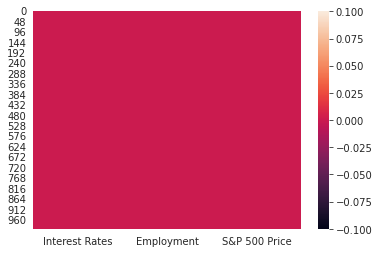

In [8]:
sns.heatmap(stock.isnull())

In [9]:
numerical_features, categorical_features = divideFeatures(stock)

There are no categorical features

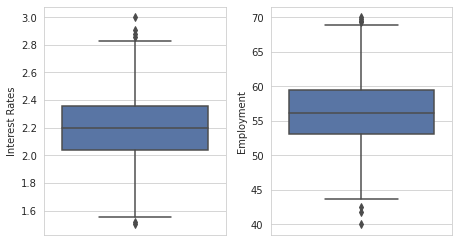

In [10]:
# boxplots of numerical features for outlier detection

fig = plt.figure(figsize=(16,30))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9, 5, i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])
plt.tight_layout()
plt.show()

Distribution check of the target variable for the linear regression assumption

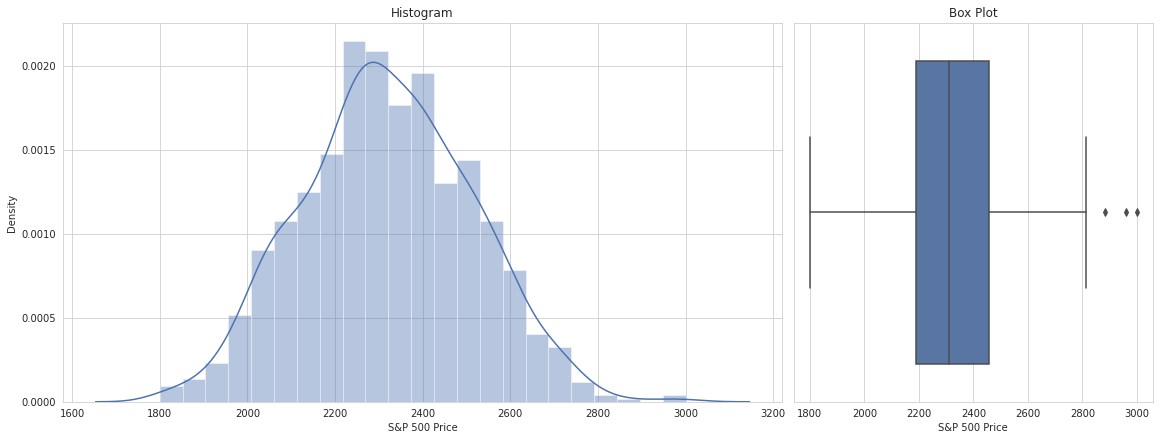

In [11]:
import matplotlib.gridspec as gridspec
fig = plt.figure(constrained_layout=True, figsize=(16,6))
grid = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Histogram')
sns.distplot(stock.loc[:,'S&P 500 Price'], norm_hist=True, ax = ax1)
ax3 = fig.add_subplot(grid[:, 2])
ax3.set_title('Box Plot')
sns.boxplot(stock.loc[:,'S&P 500 Price'], orient='v', ax = ax3)
plt.show()

- Our target variable, 'S&P 500 Price' is  normally distributed.
- Our target variable is not skewed.
- There are three outlier in the variable.

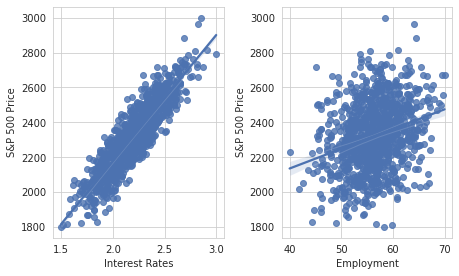

In [12]:
# scatterplot for correlation analysis of features with S&P 500 Price

fig = plt.figure(figsize=(16,30))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(8, 5, i+1)
    sns.regplot(x=numerical_features.iloc[:,i],y=stock['S&P 500 Price'])
plt.tight_layout()
plt.show()

In [13]:
# # correlation heatmap for all features

numerical_features.corr().style.background_gradient(cmap='Blues')

,Interest Rates,Employment
Interest Rates,1.000000,-0.026890
Employment,-0.026890,1.000000


# Step 3: Data Cleaning

In [14]:
# No data to clean!!!!!!!!!!!!!!!!!!!!!

# Step 4: Data Preparation

In [15]:
# No data engineering is necessary!!!

# Step 5: Data Modeling

Split Train-Test Data

In [16]:
# shuffle samples
df_shuffle = stock.sample(frac=1, random_state=seed).reset_index(drop=True)

In [18]:
df_y = df_shuffle.pop('S&P 500 Price')
df_X = df_shuffle

# split into train dev and test
X_train, X_test, y_train, y_test = skms.train_test_split(df_X, df_y, train_size=0.7, random_state=seed)
print(f"Train set has {X_train.shape[0]} records out of {len(df_shuffle)} which is {round(X_train.shape[0]/len(df_shuffle)*100)}%")
print(f"Test set has {X_test.shape[0]} records out of {len(df_shuffle)} which is {round(X_test.shape[0]/len(df_shuffle)*100)}%")

Train set has 700 records out of 1000 which is 70%
Test set has 300 records out of 1000 which is 30%


In [19]:
from sklearn.feature_selection import RFE
import sklearn.linear_model as sklm

In [20]:
scaler = skp.StandardScaler()

# apply scaling to all numerical variables except dummy variables as they are already between 0 and 1
X_train[numerical_features.columns] = scaler.fit_transform(X_train[numerical_features.columns])

# scale test data with transform()
X_test[numerical_features.columns] = scaler.transform(X_test[numerical_features.columns])


# view sample data
X_train.describe()

,Interest Rates,Employment
count,7.000000e+02,7.000000e+02
mean,-1.012523e-15,2.969054e-16
std,1.000715e+00,1.000715e+00
min,-2.853855e+00,-3.332014e+00
25%,-6.480858e-01,-6.797177e-01
50%,4.664639e-02,-3.223607e-02
75%,6.762250e-01,6.759134e-01
max,3.303883e+00,2.820309e+00


In [21]:
# Running RFE keeping the only 2 independent variables
lm = sklm.LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=2)
rfe = rfe.fit(X_train, y_train)
rfeCols = X_train.columns[rfe.support_]
X_train_rfe = X_train[rfeCols]
X_test_rfe = X_test[rfeCols]
print("Selected features by RFE are",list(rfeCols))

Selected features by RFE are ['Interest Rates', 'Employment']


In [22]:
# plotting mean test and train scores with alpha 
import operator
def plotCvResults(model_cv):
    cv_results = pd.DataFrame(model_cv.cv_results_)
    cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
    plt.plot(np.log1p(cv_results['param_alpha']), cv_results['mean_train_score'])
    plt.plot(np.log1p(cv_results['param_alpha']), cv_results['mean_test_score'])
    plt.xlabel('log1p(alpha)')
    plt.ylabel('Negative Mean Absolute Error')
    plt.title("Negative Mean Absolute Error and log1p(alpha)")
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.show()

In [23]:
# display parameters
def bestParams(model):
    print("Best Alpha for Regularized Regression:",model.get_params()['alpha'])
    model_parameters = [abs(x) for x in list(model.coef_)]
    model_parameters.insert(0, model.intercept_)
    model_parameters = [round(x, 3) for x in model_parameters]
    cols = X_train_rfe.columns
    cols = cols.insert(0, "constant")
    model_coef = sorted(list(zip(cols, model_parameters)), key=operator.itemgetter(1), reverse=True)[:3]
    print("Top 2 Model parameters (excluding constant) are:")
    for p,c in model_coef:
        print(p)

In [24]:
def modelR2AndSpread(model):
    y_train_pred = model.predict(X_train_rfe)
    print("Train r2:",skm.r2_score(y_true=y_train, y_pred=y_train_pred))
    y_test_pred = model.predict(X_test_rfe)
    print("Test r2:",skm.r2_score(y_true=y_test, y_pred=y_test_pred))
    print('Root Mean Square Error train: ' + str(np.sqrt(skm.mean_squared_error(y_train, y_train_pred))))
    print('Root Mean Square Error test: ' + str(np.sqrt(skm.mean_squared_error(y_test, y_test_pred)))) 

    fig = plt.figure(figsize=(16,10))
    plt.suptitle("Linear Regression Assumptions", fontsize = 16)

    # plot error spread
    fig.add_subplot(2, 2, 1)
    sns.regplot(y_train, y_train_pred)
    plt.title('y_train vs y_train_pred spread', fontsize = 14)
    plt.xlabel('y_train', fontsize = 12)
    plt.ylabel('y_train_pred', fontsize = 12)      

    fig.add_subplot(2, 2, 2)
    sns.regplot(y_test, y_test_pred)
    plt.title('y_test vs y_test_pred spread', fontsize = 14)
    plt.xlabel('y_test', fontsize = 12)
    plt.ylabel('y_test_pred', fontsize = 12)      

    # plot residuals for linear regression assumption
    residuals_train = y_train - y_train_pred
    fig = plt.figure(figsize=(16,6))
    fig.add_subplot(2, 2, 3)
    sns.distplot(residuals_train)
    plt.title('residuals between y_train & y_train_pred', fontsize = 14)
    plt.xlabel('residuals', fontsize = 12)

    fig.add_subplot(2, 2, 4)
    residuals_test = y_test - y_test_pred
    sns.distplot(residuals_train)
    plt.title('residuals between y_test & y_test_pred', fontsize = 14)
    plt.xlabel('residuals', fontsize = 12)
    plt.show()

Ridge regression

In [25]:
lmr = sklm.Ridge(alpha=0.001)
lmr.fit(X_train_rfe, y_train)

# predict
y_train_pred = lmr.predict(X_train_rfe)
print("Train r2:",skm.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lmr.predict(X_test_rfe)
print("Test r2:",skm.r2_score(y_true=y_test, y_pred=y_test_pred))

Train r2: 0.8996453530923453
Test r2: 0.9050907996614489


Fitting 5 folds for each of 11 candidates, totalling 55 fits


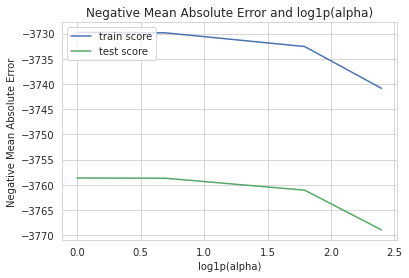

In [26]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.005, 0.01, 0.03, 0.05, 0.1, 0.5, 1.0, 5.0, 10]}
ridge = sklm.Ridge()

# cross validation
model_cv_ridge = skms.GridSearchCV(estimator = ridge, n_jobs=-1, param_grid = params, 
                             scoring= 'neg_mean_squared_error', cv = 5, 
                             return_train_score=True, verbose = 3)            
model_cv_ridge.fit(X_train_rfe, y_train)
plotCvResults(model_cv_ridge)

In [27]:
# verify log1p value for best selected alpha by GridSearch
print(model_cv_ridge.best_params_['alpha'])
print(np.log1p(model_cv_ridge.best_params_['alpha']))

0.5
0.4054651081081644


Lasso Regression

In [28]:
lml = sklm.Lasso(alpha=0.01)
lml.fit(X_train_rfe, y_train)

# predict
y_train_pred = lml.predict(X_train_rfe)
print("Train r2:",skm.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lml.predict(X_test_rfe)
print("Test r2:",skm.r2_score(y_true=y_test, y_pred=y_test_pred))

Train r2: 0.8996453473404283
Test r2: 0.905091657713237


Fitting 5 folds for each of 9 candidates, totalling 45 fits


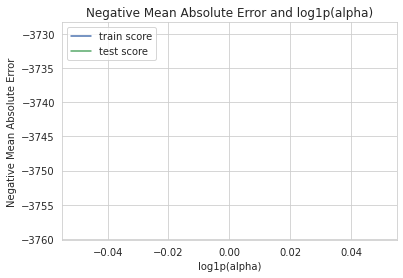

In [29]:
# list of alphas to tune
params = {'alpha': [0.00005, 0.0001, 0.0005, 0.0008, 0.001, 0.005, 0.01, 0.05, 0.1]}
lasso = sklm.Lasso()

# cross validation
model_cv_lasso = skms.GridSearchCV(estimator = lasso, n_jobs=-1, param_grid = params, 
                             scoring= 'neg_mean_squared_error', cv = 5, 
                             return_train_score=True, verbose = 3)            
model_cv_lasso.fit(X_train_rfe, y_train)
plotCvResults(model_cv_lasso)

In [31]:
# verify log1p value for best selected alpha by GridSearch
print(model_cv_lasso.best_params_['alpha'])
print(np.log1p(model_cv_lasso.best_params_['alpha']))

0.05
0.048790164169432014


# Step 6: Model Evaluation

Ridge Model Evaluation

In [32]:
alpha = model_cv_ridge.best_params_['alpha']
ridge_final = sklm.Ridge(alpha=alpha)

ridge_final.fit(X_train_rfe, y_train)
bestParams(ridge_final)

Best Alpha for Regularized Regression: 0.5
Top 2 Model parameters (excluding constant) are:
constant
Interest Rates
Employment


Train r2: 0.8996448569990156
Test r2: 0.905079923538537
Root Mean Square Error train: 61.09538344305391
Root Mean Square Error test: 60.33507671916866


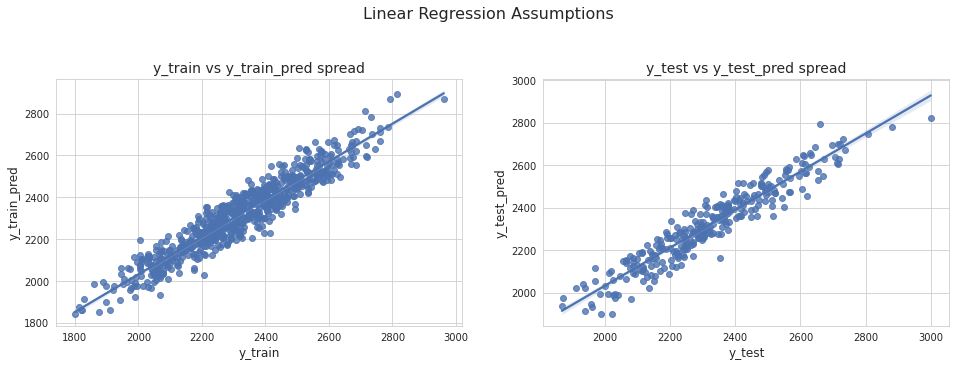

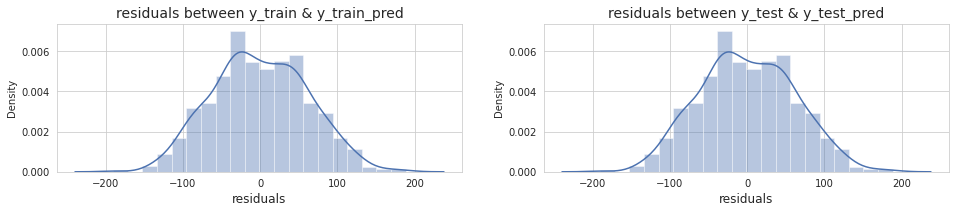

In [33]:
# r2 score for selected model
modelR2AndSpread(ridge_final)

Lasso Model Evaluation

In [34]:
alpha = model_cv_lasso.best_params_['alpha']
lasso_final = sklm.Lasso(alpha=alpha)

lasso_final.fit(X_train_rfe, y_train)
bestParams(lasso_final)

Best Alpha for Regularized Regression: 0.05
Top 2 Model parameters (excluding constant) are:
constant
Interest Rates
Employment


Train r2: 0.8996452098270007
Test r2: 0.9050949216899447
Root Mean Square Error train: 61.095276043575716
Root Mean Square Error test: 60.33030981211183


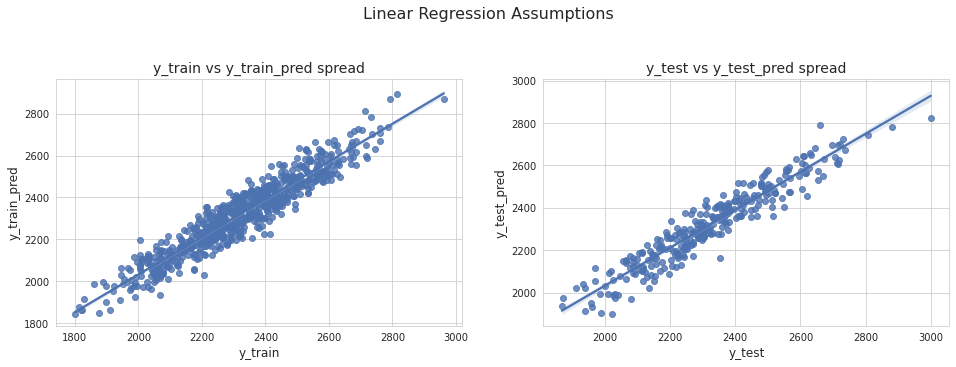

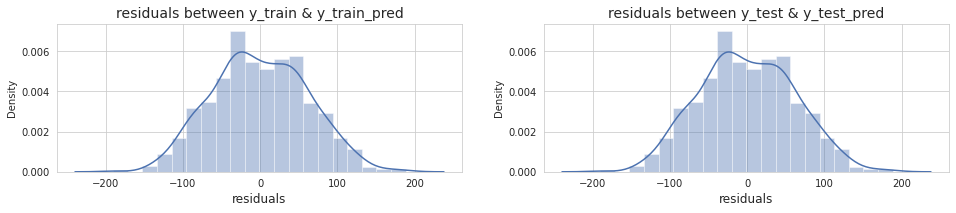

In [35]:
# r2 score for selected model
modelR2AndSpread(lasso_final)

Both Lasso and Ridge regression have the same performance!!

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4fb06a47-c184-4298-b6f3-30f194364297' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>